<a href="https://colab.research.google.com/github/alinyaraujos/machine-learning-cardio/blob/master/cardi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O conjunto de dados analisados é sobre insuficiência cardíaca


https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/datasets/heart_failure_clinical_records_dataset.csv')

In [ ]:
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
#verificando se realmente o alvo está divido em duas classes
dados['DEATH_EVENT'].nunique()

2

In [ ]:
#verificando se exitem dados faltantes
dados.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


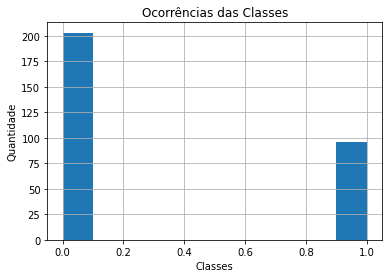

In [ ]:
#verificando ocorrências das classes
plt.hist(dados['DEATH_EVENT'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

In [ ]:
#contando quantidades de ocorrencias de cada classe
print('Não faleceu:',dados[dados['DEATH_EVENT']==0].shape[0])
print('Faleceu:',dados[dados['DEATH_EVENT']==1].shape[0])

Não faleceu: 203
Faleceu: 96


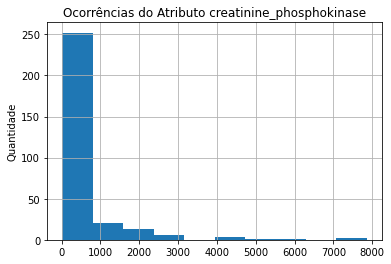

In [ ]:
#verificando ocorrências do atributo creatinine_phosphokinase
plt.hist(dados['creatinine_phosphokinase'],10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo creatinine_phosphokinase')
plt.grid(True)
plt.show()

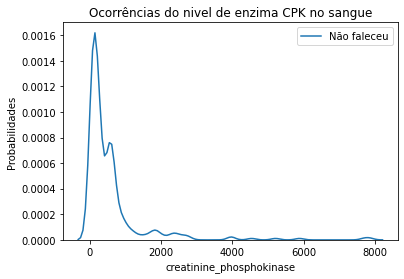

In [ ]:
sns.distplot(dados.creatinine_phosphokinase, hist=False, rug=False,label='Não faleceu')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do nivel de enzima CPK no sangue')
plt.show()

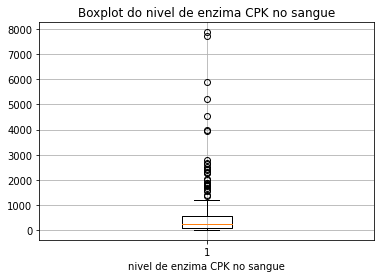

In [ ]:
plt.boxplot(dados.creatinine_phosphokinase)
plt.title('Boxplot do nivel de enzima CPK no sangue')
plt.xlabel('nivel de enzima CPK no sangue')
plt.grid()
plt.show()

In [ ]:
notDeath = dados[dados['DEATH_EVENT']==0].drop(columns=['DEATH_EVENT']).reset_index(drop=True)


In [ ]:
death = dados[dados['DEATH_EVENT']==1].drop(columns=['DEATH_EVENT']).reset_index(drop=True)


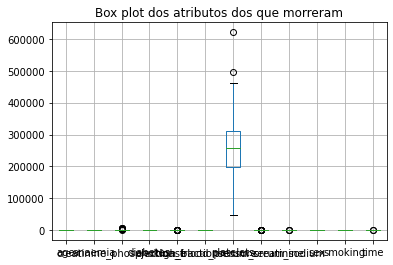

In [ ]:
#plotando boxplots dos dados das instâncias dos pacientes que morreram
death.boxplot()
plt.title('Box plot dos atributos dos que morreram')
plt.show()

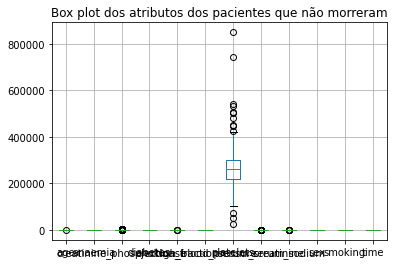

In [ ]:
#plotando boxplots dos dados das instâncias dos pacientes que não morreram
notDeath.boxplot()
plt.title('Box plot dos atributos dos pacientes que não morreram')
plt.show()

In [ ]:
creatinine_phosphokinase = dados.creatinine_phosphokinase
creatinine_phosphokinase

0       582
1      7861
2       146
3       111
4       160
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 299, dtype: int64

In [ ]:
ejection_fraction = dados.ejection_fraction
ejection_fraction

0      20
1      38
2      20
3      20
4      20
       ..
294    38
295    38
296    60
297    38
298    45
Name: ejection_fraction, Length: 299, dtype: int64

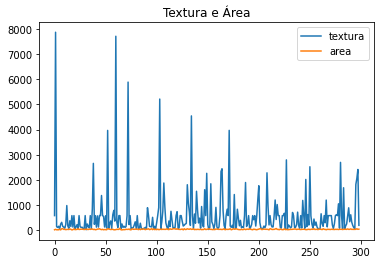

In [ ]:
plt.plot(creatinine_phosphokinase,label='textura')
plt.plot(ejection_fraction,label='area')
plt.title('Textura e Área')
plt.legend()
plt.show()

In [ ]:
creatinine_phosphokinase = creatinine_phosphokinase/creatinine_phosphokinase.max()


In [ ]:
ejection_fraction = ejection_fraction/ejection_fraction.max()


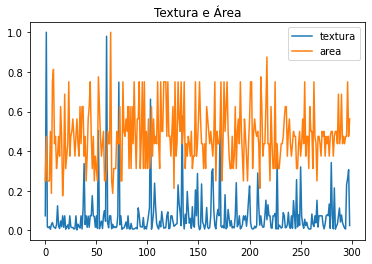

In [ ]:
# re-escala pelo máximo
plt.plot(creatinine_phosphokinase,label='creatinine_phosphokinase')
plt.plot(ejection_fraction,label='ejection_fraction')
plt.title('Creatini e Área')
plt.legend()
plt.show()

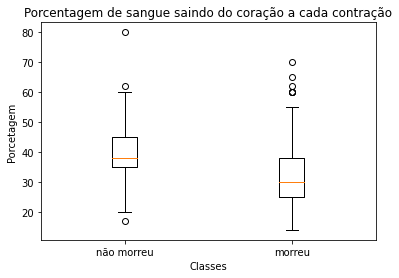

In [ ]:
# box plot comparando o perimetro medio para as duas classes
plt.boxplot([notDeath.ejection_fraction,death.ejection_fraction],labels=['não morreu','morreu'])
plt.xlabel('Classes')
plt.ylabel('Porcetagem')
plt.title('Porcentagem de sangue saindo do coração a cada contração')
plt.show()

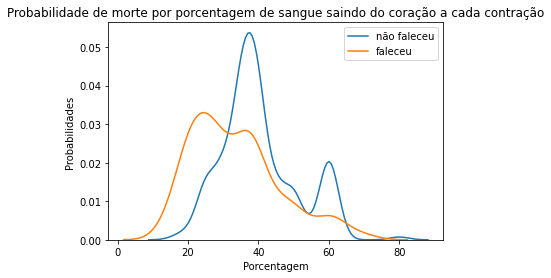

In [ ]:
sns.distplot(notDeath.ejection_fraction, hist=False, rug=False,label='não faleceu')
sns.distplot(death.ejection_fraction, hist=False, rug=False,label='faleceu')
plt.xlabel('Porcentagem')
plt.ylabel('Probabilidades')
plt.title('Probabilidade de morte por porcentagem de sangue saindo do coração a cada contração')
plt.show()

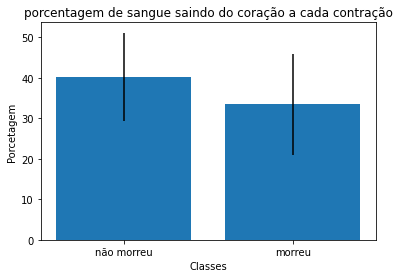

In [ ]:
# gráfico de barras comparando a média e desvio padrão da porcentagem de sangue saindo do coração a cada contração para as duas classes
plt.bar(['não morreu','morreu'],[notDeath.ejection_fraction.mean(),death.ejection_fraction.mean()],yerr=[notDeath.ejection_fraction.std(),death.ejection_fraction.std()])
plt.xlabel('Classes')
plt.ylabel('Porcetagem')
plt.title('porcentagem de sangue saindo do coração a cada contração')
plt.show()

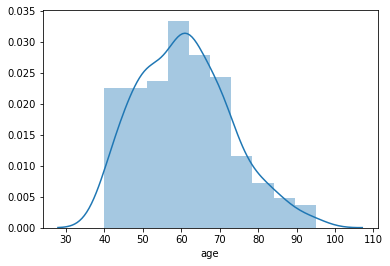

In [ ]:
#A maioria das pessoas então com idades entre 40 a 70 anos
sns.distplot(dados['age'])

In [ ]:
corr = dados.corr()
corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


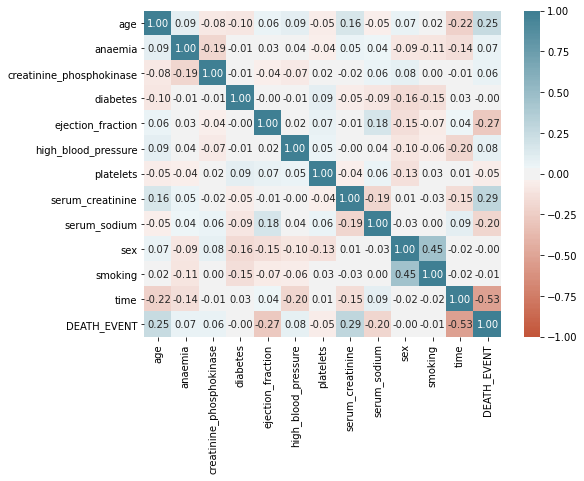

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=sns.diverging_palette(20, 220, n=200))

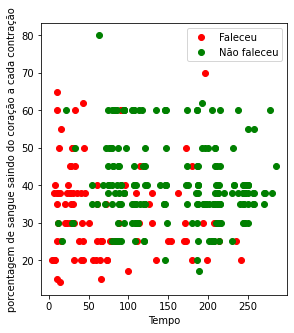

In [ ]:
#quanto mais sangue saindo do coração a cada contração em menos tempo maior é a probabilidade do paciente falecer
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(x=dados.time[dados.DEATH_EVENT==1],y=dados.ejection_fraction[dados.DEATH_EVENT==1],c='red')
plt.scatter(x=dados.time[dados.DEATH_EVENT==0],y=dados.ejection_fraction[dados.DEATH_EVENT==0],c='green')
plt.xlabel('Tempo')
plt.ylabel('porcentagem de sangue saindo do coração a cada contração')
plt.legend(['Faleceu','Não faleceu'])

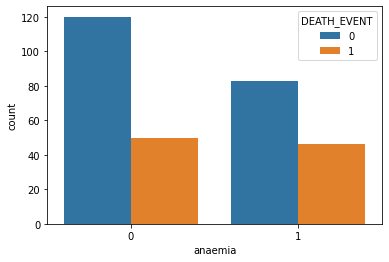

In [62]:
#as pessoas que eram anemicas têm um taxa de mortalidade menor
sns.countplot(x='anaemia',hue='DEATH_EVENT',data=dados)